In [13]:
from allensdk.core.cell_types_cache import CellTypesCache
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ctc = CellTypesCache(manifest_file=os.path.expanduser('~/Dropbox/Data/Allen_cell_types/cell_types/manifest.json'))

In [5]:
cell_specimen_id = 464212183

In [6]:
import pprint

# download and open an SWC file
cell_id = 480114344
morphology = ctc.get_reconstruction(cell_id) 

# the compartment list has all of the nodes in the file
pprint.pprint(morphology.compartment_list[0])

2017-11-19 23:10:27,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491771448


{'children': [1,
              1763,
              2012,
              2089,
              2421,
              2604,
              2821,
              3147,
              3440,
              3491,
              3552,
              4015],
 'id': 0,
 'parent': -1,
 'radius': 7.6078,
 'tree_id': 0,
 'type': 1,
 'x': 444.3296,
 'y': 503.0168,
 'z': 31.92}


In [9]:
morphology.compartment_list[:3]

[{'children': [1,
   1763,
   2012,
   2089,
   2421,
   2604,
   2821,
   3147,
   3440,
   3491,
   3552,
   4015],
  'id': 0,
  'parent': -1,
  'radius': 7.6078,
  'tree_id': 0,
  'type': 1,
  'x': 444.3296,
  'y': 503.0168,
  'z': 31.92},
 {'children': [2],
  'id': 1,
  'parent': 0,
  'radius': 0.9775,
  'tree_id': 0,
  'type': 4,
  'x': 440.3542,
  'y': 497.1069,
  'z': 32.0737},
 {'children': [3],
  'id': 2,
  'parent': 1,
  'radius': 0.1513,
  'tree_id': 0,
  'type': 4,
  'x': 439.9584,
  'y': 496.0407,
  'z': 32.2258}]

In [10]:
# download and open a marker file
markers = ctc.get_reconstruction_markers(cell_id) 
pprint.pprint(markers[0])

2017-11-19 23:11:56,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606365


{'name': 10, 'x': 527.5029999999999, 'y': 496.4319, 'z': 12.4555}


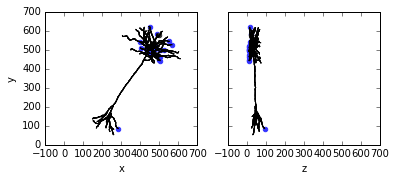

In [15]:
from allensdk.core.swc import Marker
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
axes[0].set_aspect('equal', 'box-forced')
axes[1].set_aspect('equal', 'box-forced')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]

axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# no reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]

axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')

axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()